<h2>Problem Statement</h2>
<p>Given 2015 and 2016 Iowa liquor sales data, determine the best locations for a new storefront.</p>

<h2>Risks and Assumptions</h2>
<p>We chose to work with only 10% of the dataset. There were 2.7 million transactions in the entire data and we only worked with 270,000 transactions. There were also several errors in the dataset. We cleaned up the data as extensively as we could but ended up dropping a couple hundred rows that didn't have complete data. We also did not remove any outliers so there could be one stores that heavily skews the data for certain counties.  </p>
<p>
We assumed that the best place to build a new store would be near stores that are performing exceptionally well. Our main assumption here is that location is the main predictor of success for our store, but a store can perform well for several different reasons. </p>

<h2>Data Analysis</h2>
<p>
We wanted to see which stores had the highest sales and where they were located. Des Moines had the two highest performing stores (2633 and 4829) which had total sales of $407,000 and $363,000 respectively.  

</p>

<p>
	In order to better analyze where a good new store location would be, we added in external data from iowa.gov. We brought in city population and county population which we then planned to use to better predict where underserved markets are. 
</p>

<p>
	We created a linear regression model to try to predict where sales would be highest based on 'County', 'State Bottle Retail' and 'Bottles Sold'. We used the 2015 data as our training data to predict what sales would be like in 2016. Below are graphs of how our model compared to 'Actual Sales' and what the residuals looked like.

	<img src="http://i64.tinypic.com/121zsiw.png">
	<img src="http://i65.tinypic.com/11ryyiv.png">
</p>
<p>
In order to achieve our main goal of determining where the best performing stores are, we plotted the top 10 counties with the highest sales. Taking it one step further we wanted to see what the average sales were per store in those counties. After correcting to show the results per store, we found that sales per store did not vary nearly as much as sales per county. 
</p>

<p>
	Our next step in determining where we should build a new store was to show 'Profit per Store' and show the top 10 counties. We found that Johnson county had the highest profit per store followed by Polk, Scott, Dallas, Woodbury, Cerro Gordo, Dickinson, Howard, Kossuth, and Linn. We then wanted to make sure that we weren't planning on building a store in a county that had very few stores. </p>

<p>
	The top 10 counties with the highest total of stores are Polk (207), Linn (101), Black Hawk (73), Scott (66), Johnson (53), Pottawattamie (53), Dubuque (40), Story (38), Woodbury (38), and Des Moines(21). So while Dallas had the 3rd highest profit per store, we'd be reluctant to build there since they don't have many stores (17). Alternatively, Polk seems like a great place to build a new store since there are already 207 stores and it still has 2nd highest profit per store. If we built the 208th store, we'd expect for their to be a minimal decrease on the profit per store average in the county whereas if we built in Dallas we'd expect a more significant decline.
</p>


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [2]:
## Load the data into a DataFrame
djs = pd.read_csv('assets/Iowa_Liquor_Sales_reduced.csv', encoding='latin-1')
df = pd.read_csv('assets/iowa_15.csv', encoding='latin-1')

pd.options.mode.chained_assignment = None

/Users/Jesse/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
djs.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19,2016,3


In [5]:
#Converts Date to parsible format.
djs['Date'] = [datetime.strptime(x, '%m/%d/%Y').date() for x in djs['Date']]
djs['Date'] = pd.to_datetime(djs["Date"])
djs['Year'], djs['Month'] = djs['Date'].dt.year, djs['Date'].dt.month

In [4]:
#Removes spaces from column names.
djs.columns = djs.columns.str.strip()
djs.columns = [x.replace(' ', '_') for x in djs.columns]

In [5]:
#Sam's Club
key = djs[['Store_Number', 'County', 'County_Number', 'Zip_Code', 'City']]
key.drop_duplicates(inplace=True)
key.set_index('Store_Number', inplace=True)

key = key[pd.notnull(key['County_Number'])]
KeyHelp = key.T

count_len = len(djs['County_Number'])
county_len = len(djs['County'])

for i in range(count_len):
   if np.isnan(djs['County_Number'][i]):
       try:
           djs['County_Number'][i]= KeyHelp[djs['Store_Number'][i]][1]
       except: 
           djs['County_Number'][i]

for i in range(county_len):
   try:
       if np.isnan(djs['County'][i]):
           djs['County'][i]= KeyHelp[djs['Store_Number'][i]][0]
   except: 
       djs['County'][i]


        
key.set_index('Zip_Code', inplace=True)
KeyHelp=key.T

for i in range(count_len):
   if np.isnan(djs['County_Number'][i]):
       try:
           djs['County_Number'][i]= KeyHelp[djs['Zip_Code'][i]][1]
       except: 
           djs['County_Number'][i]

for i in range(county_len):
   try:
       if np.isnan(djs['County'][i]):
           djs['County'][i]= KeyHelp[djs['Zip_Code'][i]][0]
   except: 
       djs['County'][i]



key.set_index('City', inplace=True)
KeyHelp=key.T

for i in range(count_len):
   if np.isnan(djs['County_Number'][i]):
       try:
           djs['County_Number'][i]= KeyHelp[djs['City'][i]][1]
       except: 
           djs['County_Number'][i]

for i in range(county_len):
   try:
       if np.isnan(djs['County'][i]):
           djs['County'][i]= KeyHelp[djs['City'][i]][0]
   except: 
       djs['County'][i]

In [6]:
djs.dropna(inplace=True)
djs = djs.reset_index(drop=True)

In [7]:
#DOUG'S CODE OF CONDUCT

#Converts State Bottle Cost Series to Float
djs['State_Bottle_Cost'] = (djs['State_Bottle_Cost'].replace( '[\$,)]','', regex=True )\
                            .replace( '[(]','-',   regex=True ).astype(float))

#Converts State Bottle Retail Series to Float
djs['State_Bottle_Retail'] = (djs['State_Bottle_Retail'].replace( '[\$,)]','', regex=True )\
                              .replace( '[(]','-',   regex=True ).astype(float))

#Converts Sale Dollars Series to Float
djs['Sale_(Dollars)'] = (djs['Sale_(Dollars)'].replace( '[\$,)]','', regex=True )\
                         .replace( '[(]','-',   regex=True ).astype(float))

#Converts City names to all CAPS
djs['City'] = map(lambda x: x.upper(), djs['City'])

#Calculates profit per transaction
djs['Profit'] = djs['Sale_(Dollars)'] - (djs['State_Bottle_Cost'] * djs['Bottles_Sold'])

In [8]:
#Creating dataframe with City/County name and estimated 2015 population
name_pop_df = df[['NAME', 'POPESTIMATE2015']]
name_pop_df['NAME'] = (name_pop_df['NAME'].replace( ' city','', regex=True ))

#Cleaning data.  Removing NAME with "(pt.)"
temp_df = name_pop_df.T
name_pop_df = temp_df[[ind for ind, x in enumerate(name_pop_df['NAME']) if "(pt.)" not in x]].T
name_pop_df = name_pop_df.reset_index(drop=True)

#Cleaning data.  Removing NAME with "Balance"
temp_df = name_pop_df.T
name_pop_df = temp_df[[ind for ind, x in enumerate(name_pop_df['NAME']) if "Balance" not in x]].T
name_pop_df = name_pop_df.reset_index(drop=True)

#Sorts dataframe alphabetically by NAME and remove duplicates.
name_pop_df = name_pop_df.sort(columns=['NAME'])
name_pop_df = name_pop_df.drop_duplicates(keep='first').reset_index(drop=True)

/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [9]:
#Add County Population
county_pop_df = name_pop_df.T
county_pop_df = county_pop_df[[ind for ind, x in enumerate(name_pop_df['NAME']) if "County" in x]].T
county_pop_df['NAME'] = (county_pop_df['NAME'].replace( ' County','', regex=True ))
county_pop_df = county_pop_df.reset_index(drop=True)
county_pop_df = county_pop_df.set_index(county_pop_df['NAME'])
del county_pop_df['NAME']
djs = djs.merge(county_pop_df, how='left', left_on="County", right_index=True)
djs.rename(columns={'POPESTIMATE2015':'County_Pop'}, inplace = True)

#Add City Population
city_pop_df = name_pop_df.T
city_pop_df = city_pop_df[[ind for ind, x in enumerate(name_pop_df['NAME']) if "County" not in x]].T
city_pop_df = city_pop_df.reset_index(drop=True)
city_pop_df['NAME'] = map(lambda x: x.upper(), city_pop_df['NAME'])
city_pop_df = city_pop_df.set_index(city_pop_df['NAME'])
del city_pop_df['NAME']
djs = djs.merge(city_pop_df, how='left', left_on="City", right_index=True)
djs.rename(columns={'POPESTIMATE2015':'City_Pop'}, inplace = True)

In [10]:
#Add Store Count per City 
store_count = djs[['Store_Number', 'City']]
store_count = store_count.sort('Store_Number').drop_duplicates()
store_count = store_count.groupby('City').count()
store_count.rename(columns={'Store_Number':'Store_Count_City'}, inplace = True)
djs = djs.merge(store_count, how='left', left_on='City', right_index=True)

#Add Store Count per County
store_count = djs[['Store_Number', 'County']]
store_count = store_count.sort('Store_Number').drop_duplicates()
store_count = store_count.groupby('County').count()
store_count.rename(columns={'Store_Number':'Store_Count_County'}, inplace = True)
djs = djs.merge(store_count, how='left', left_on='County', right_index=True)

/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [11]:
#Add Profit by City
djs_profit_by_city = djs.groupby(['City'])['Profit'].agg(([np.sum]))
djs_profit_by_city.rename(columns={'sum':'Profit_City'}, inplace = True)
djs = djs.merge(djs_profit_by_city, how='left', left_on='City', right_index=True)

#Add Profit by County
djs_profit_by_county = djs.groupby(['County'])['Profit'].agg(([np.sum]))
djs_profit_by_county.rename(columns={'sum':'Profit_County'}, inplace = True)
djs = djs.merge(djs_profit_by_county, how='left', left_on='County', right_index=True)

#Add Profit by Store
djs_profit_by_store = djs.groupby(['Store_Number'])['Profit'].agg(([np.sum]))
djs_profit_by_store.rename(columns={'sum':'Profit_Store'}, inplace = True)
djs = djs.merge(djs_profit_by_store, how='left', left_on='Store_Number', right_index=True)

In [12]:
djs.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,...,Year,Month,Profit,County_Pop,City_Pop,Store_Count_City,Store_Count_County,Profit_City,Profit_County,Profit_Store
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,...,2016,3,60.00,172126,102582,44,67,5.785460e+06,8.326214e+06,121078.90
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,...,2016,3,12.50,172126,102582,44,67,5.785460e+06,8.326214e+06,121078.90
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,...,2016,3,17.94,133455,41255,17,73,2.197512e+06,6.618476e+06,100121.29
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,...,2016,3,53.76,467711,210330,90,207,1.476489e+07,2.609751e+07,516414.69
4,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,...,2016,3,11.50,133455,41255,17,73,2.197512e+06,6.618476e+06,220310.64


In [13]:
#Creates a Dataframe with City Data.
city_df = djs[['City', 'City_Pop', 'Profit_City', 'Store_Count_City', 'County']]
city_df.drop_duplicates(inplace=True)
city_df = city_df.reset_index()


rang = len(city_df['City'])
best = [(city_df['Profit_City'][x] / city_df['Store_Count_City'][x]) for x in range(rang)]
best = pd.DataFrame(best)
best.rename(columns={0:'City_Profit_Per_Store'}, inplace = True)
city_df = city_df.merge(best, how='left', left_index=True, right_index=True)

In [14]:
city_df = city_df.sort(columns=['City_Profit_Per_Store'], ascending=False)
city_df.head(11)

/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,City,City_Pop,Profit_City,Store_Count_City,County,City_Profit_Per_Store
18,603,MOUNT VERNON,4486,9.110764e+05,2,Linn,455538.220000
52,6917,WINDSOR HEIGHTS,4889,1.992345e+06,6,Polk,332057.450000
62,6967,OTTUWMA,NaN,2.713172e+05,1,Wapello,271317.190000
183,18602,MILFORD,3018,5.009588e+05,2,Dickinson,250479.410000
225,27223,BETTENDORF,35505,2.206930e+06,12,Iowa,183910.822500
49,6900,BETTENDORF,35505,2.206930e+06,12,Scott,183910.822500
7,41,CORALVILLE,20608,2.256160e+06,13,Johnson,173550.795385
204,20190,LEMARS,NaN,3.381598e+05,2,Plymouth,169079.910000
2,3,DES MOINES,210330,1.476489e+07,90,Polk,164054.324000
47,6897,IOWA CITY,74220,4.263119e+06,26,Johnson,163966.106538


In [15]:
testj = city_df.iloc[:5][:]
bestj = city_df.iloc[6:11][:]

hemp_df = pd.concat([testj, bestj])

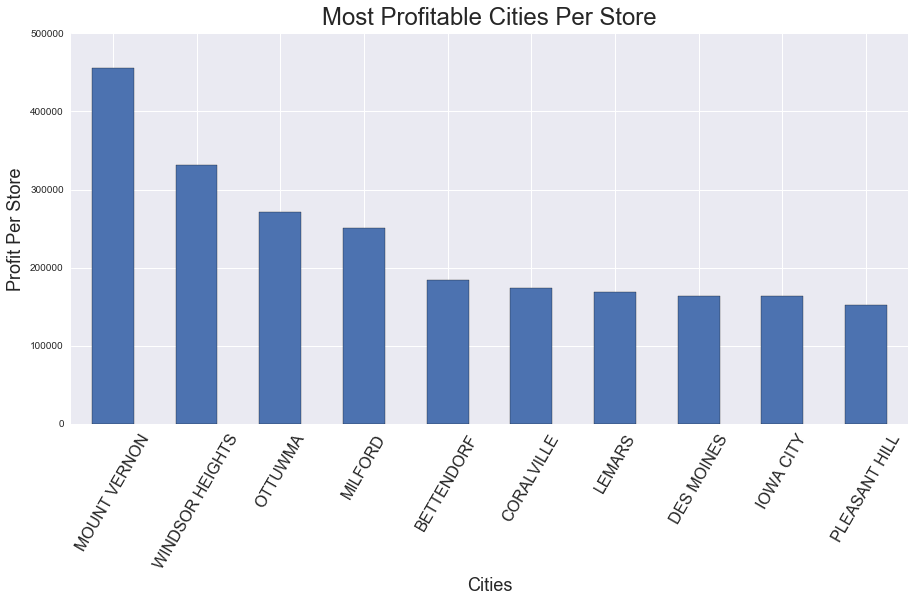

In [16]:
temp_temp_df = hemp_df[['City', 'City_Profit_Per_Store']]
ax = temp_temp_df.plot(figsize=(15,7),kind="bar", fontsize=10, legend=False)

ax.set_title("Most Profitable Cities Per Store", fontsize=24, y=1.01)
plt.xticks(np.linspace(0,len(hemp_df['City'])-1,len(hemp_df['City'])),hemp_df['City'], rotation=60, fontsize=16)
ax.set_xlabel('Cities', fontsize=18)
ax.set_ylabel('Profit Per Store', fontsize=18);

In [17]:
#Creates a Dataframe with County Data.
county_df = djs[['County', 'County_Number', 'County_Pop', 'Profit_County', 'Store_Count_County']]
county_df.drop_duplicates(inplace=True)
county_df = county_df.reset_index()
del county_df['index']

rang = len(county_df['County'])
best = [(county_df['Profit_County'][x] / county_df['Store_Count_County'][x]) for x in range(rang)]
best = pd.DataFrame(best)
best.rename(columns={0:'County_Profit_Per_Store'}, inplace = True)
county_df = county_df.merge(best, how='left', left_index=True, right_index=True)

In [18]:
county_df = county_df.sort(columns=['County_Profit_Per_Store'], ascending=False)

/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [19]:
county_df.head(10)

,County,County_Number,County_Pop,Profit_County,Store_Count_County,County_Profit_Per_Store
4,Johnson,52.0,144251,7.178076e+06,53,135435.399811
21,Dallas,25.0,80133,2.203686e+06,17,129628.585294
2,Polk,77.0,467711,2.609751e+07,207,126074.923478
0,Scott,82.0,172126,8.326214e+06,67,124271.854478
3,Cerro Gordo,17.0,43017,2.353272e+06,21,112060.548571
24,Woodbury,97.0,102782,4.115286e+06,39,105520.164359
27,Winneshiek,96.0,20709,5.273571e+05,5,105471.412000
39,Kossuth,55.0,15165,7.218539e+05,7,103121.988571
60,Dickinson,30.0,17111,1.544651e+06,15,102976.731333
12,Linn,57.0,219916,1.028499e+07,101,101831.618020


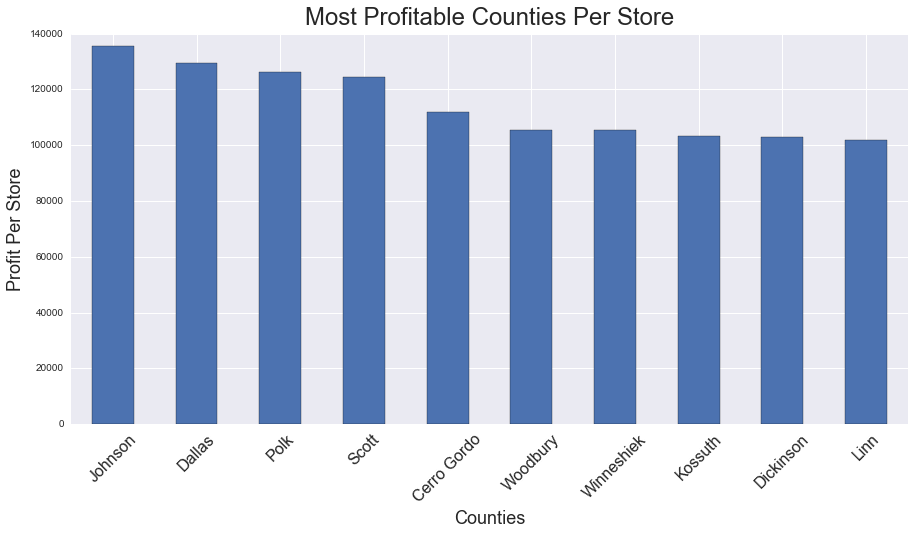

In [20]:

hemp_df = county_df.head(10)
temp_temp_df = hemp_df[['County', 'County_Profit_Per_Store']]
ax = temp_temp_df.plot(figsize=(15,7),kind="bar", fontsize=10, legend=False)

ax.set_title("Most Profitable Counties Per Store", fontsize=24, y=1.01)
plt.xticks(np.linspace(0,len(hemp_df['County'])-1,len(hemp_df['County'])),hemp_df['County'], rotation=45, fontsize=16)
ax.set_xlabel('Counties', fontsize=18)
ax.set_ylabel('Profit Per Store', fontsize=18);

MSE: 45349.4907153


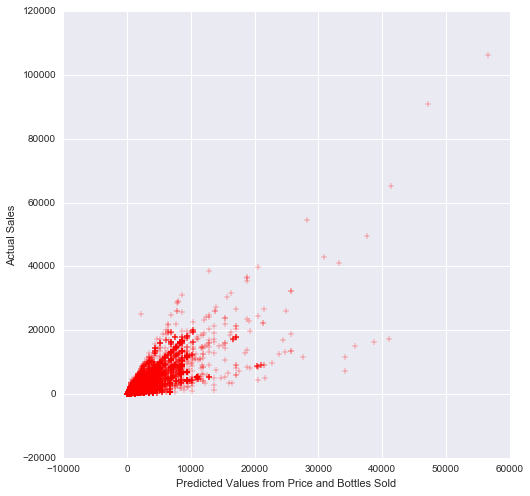

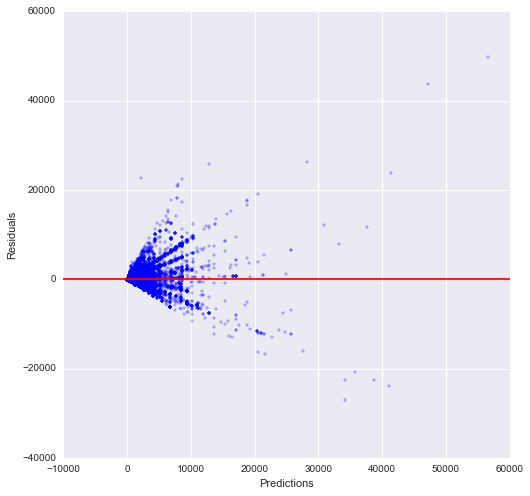

In [21]:
#Sets up regression mapping State_Bottle_Retail and Bottles_Sold to Sale_Dollars
targets = djs['Sale_(Dollars)']
djstargets = pd.DataFrame(targets)
lm = linear_model.LinearRegression()
X = djs[["State_Bottle_Retail", "Bottles_Sold"]]
y = djstargets["Sale_(Dollars)"]

model = lm.fit(X,y)
predictions = lm.predict(X)

#Creates graph of predicted values
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Price and Bottles Sold")
plt.ylabel("Actual Sales")
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

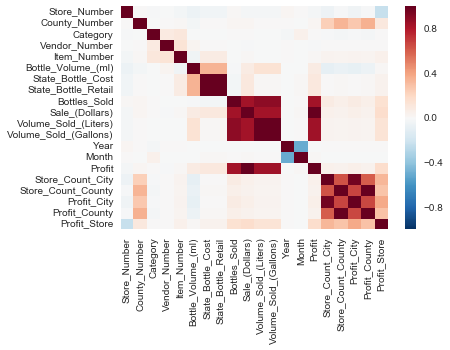

In [22]:
#Heatmap mapping correlation
sns.heatmap(djs.corr());

"plt.plot_date(djs['Date'], djs['Sale_(Dollars)'])\nplt.show()"

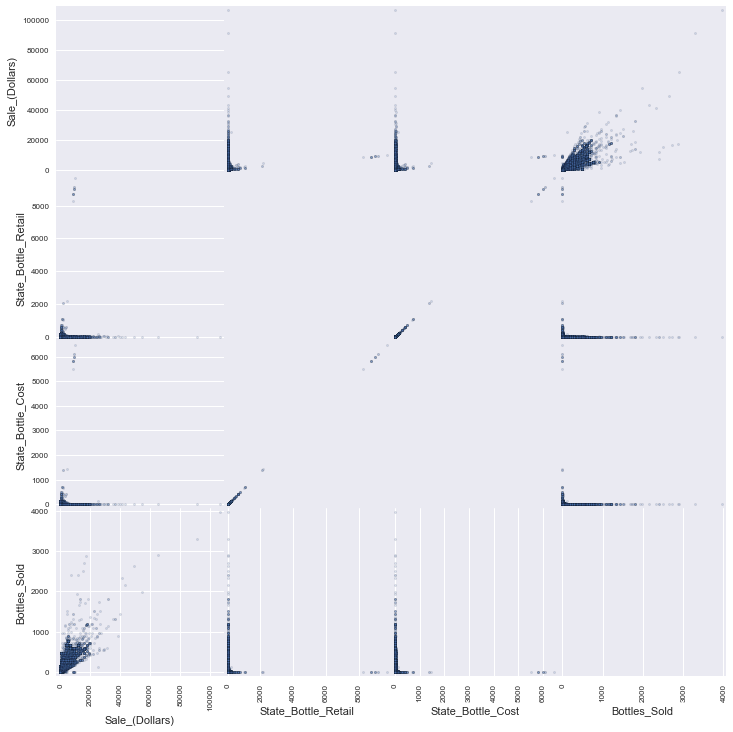

In [23]:
scatter_matrix(djs[['Date', 'Zip_Code','Sale_(Dollars)', 'State_Bottle_Retail','State_Bottle_Cost', 'Bottles_Sold']], alpha=0.2, figsize=(12, 12), diagonal='Sale_(Dollars)')


'''plt.plot_date(djs['Date'], djs['Sale_(Dollars)'])
plt.show()'''


MSE: 45349.4008798


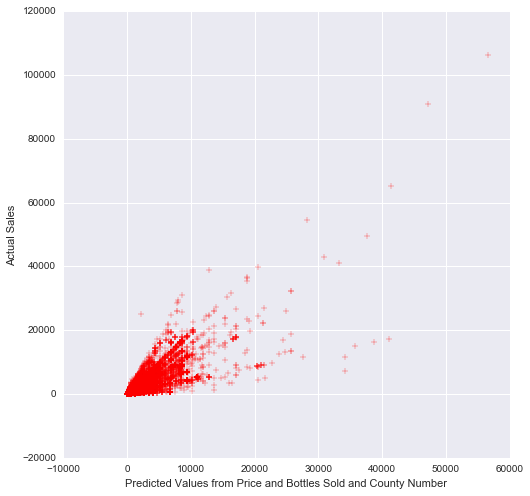

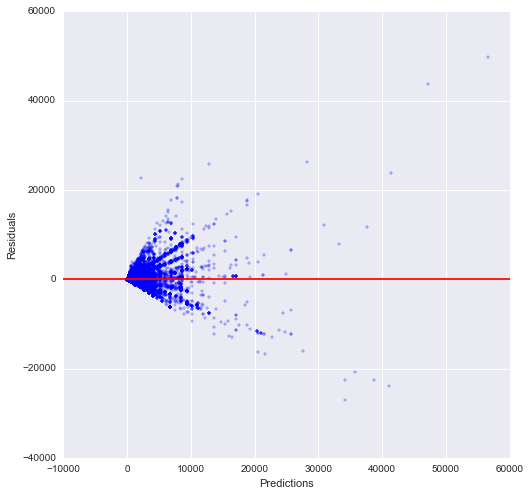

In [24]:
#Sets up regression mapping State_Bottle_Retail, Bottles_Sold, and County_Number to Sale_Dollars
targets = djs['Sale_(Dollars)']
djstargets = pd.DataFrame(targets)
lm = linear_model.LinearRegression()
X = djs[["State_Bottle_Retail", "Bottles_Sold", "County_Number"]]
y = djstargets["Sale_(Dollars)"]

model = lm.fit(X,y)
predictions = lm.predict(X)


#Creates graph of predicted values.
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Price and Bottles Sold and County Number")
plt.ylabel("Actual Sales")
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

In [25]:
train_data=djs.loc[djs['Year'] != 2016]
test_data=djs.loc[djs['Year'] == 2016]

In [26]:
#define train data X and Y
train_X=train_data[['State_Bottle_Cost', 'Bottles_Sold', 'County_Number' ]]
train_Y=train_data[['Sale_(Dollars)']]

In [27]:
#Define test X
test_X=test_data[['State_Bottle_Cost', 'Bottles_Sold', 'County_Number']]

In [28]:
#create linear model
lr=linear_model.LinearRegression()
lr_model=lr.fit(train_X,train_Y)
predictions=lr_model.predict(train_X)

MSE: 46093.9960704


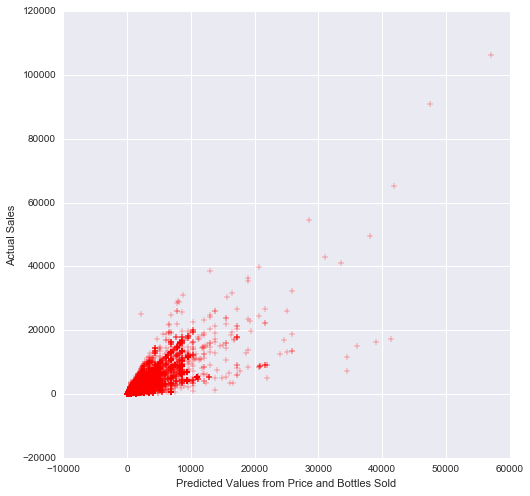

In [29]:
#plot predictions for test against y train values
print "MSE:", mean_squared_error(train_Y, predictions)
plt.figure(figsize=(8,8))
plt.scatter(predictions, train_Y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Price and Bottles Sold")
plt.ylabel("Actual Sales")
plt.show()

In [30]:
#create data to plug in to model
county_values= pd.pivot_table(djs, index='County_Number', values=['State_Bottle_Cost', 'Bottles_Sold'], aggfunc=np.sum)
county_values.reset_index(inplace=True)
county_values

,County_Number,Bottles_Sold,State_Bottle_Cost
0,1.0,43482,5.089503e+04
1,2.0,10173,2.283713e+04
2,3.0,74514,1.064640e+05
3,4.0,81572,1.002764e+05
4,5.0,18552,2.118064e+04
5,6.0,70056,8.808903e+04
6,7.0,1729609,1.413844e+06
7,8.0,165439,1.917111e+05
8,9.0,158907,2.168137e+05
9,10.0,123120,1.538298e+05


In [31]:
#find predictive total sales for each county
yhat_counties=lr_model.predict(county_values)
counties_predicted=pd.DataFrame(yhat_counties)

In [32]:
#test for how many stores in each county
djs_average_profit = djs.groupby([ 'County_Number', 'Store_Number'])['Profit'].agg(([np.sum]))

In [33]:
#create dataframe with count of stores for each County
Stores_County= pd.pivot_table(djs, index='County_Number', values=['Store_Number'], aggfunc=lambda x: len(x.unique()))
Stores_County.reset_index(inplace=True)
Stores_County.columns=['County_Number', 'Num_of_Stores']
Stores_County

,County_Number,Num_of_Stores
0,1.0,8
1,2.0,1
2,3.0,6
3,4.0,6
4,5.0,3
5,6.0,6
6,7.0,73
7,8.0,15
8,9.0,9
9,10.0,10


In [34]:
#create new table with predicted county values and make sales by thousands
CountyP_Df=pd.concat([county_values['County_Number'], counties_predicted/1000], axis=1)
CountyP_Df.columns=['County_Number', 'Total_Sales_Predicted']

#add store number as a column and then divide profit by stores
CountyP_Df=pd.concat([CountyP_Df, Stores_County['Num_of_Stores']], axis=1)
CountyP_Df['PSales_per_Store']=CountyP_Df['Total_Sales_Predicted']/CountyP_Df['Num_of_Stores']
CountyP_Df.sort('PSales_per_Store', ascending=False, inplace=True)
CountyP_Df.reset_index(inplace=True, drop=True)
top10Countystore= CountyP_Df.loc[:10, :]
CountyP_Df.sort('Total_Sales_Predicted', ascending=False, inplace=True)
CountyP_Df.reset_index(inplace=True, drop=True)
top10CountyTSales= CountyP_Df.loc[:10, :]

/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Jesse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


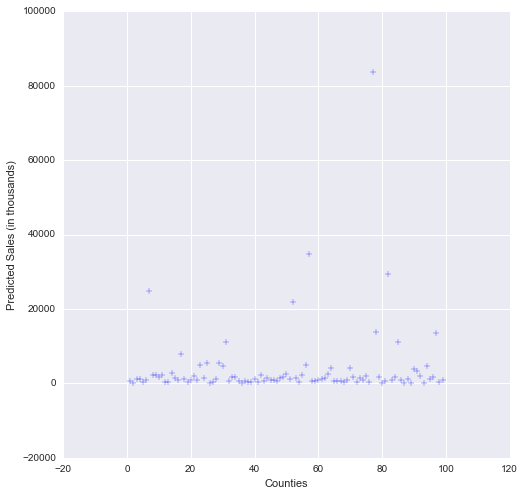

In [35]:
#plot counties and predicted total sales
plt.figure(figsize=(8,8))
plt.scatter(CountyP_Df['County_Number'], CountyP_Df['Total_Sales_Predicted'], s=30, c='blue', marker='+', zorder=10)
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

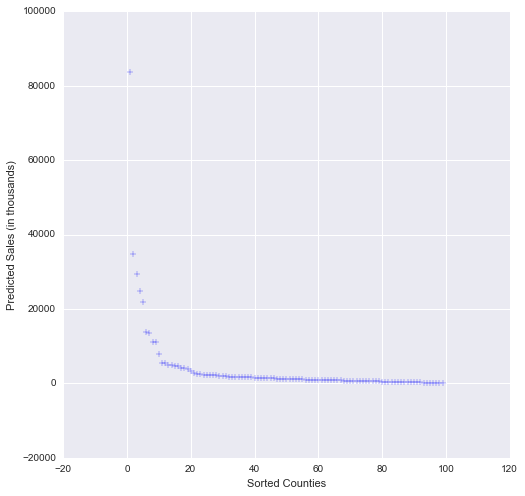

In [36]:
#plot counties and predicted total sales
#Sorted wrong but shows interesting thingy
plt.figure(figsize=(8,8))
plt.scatter(county_values['County_Number'], CountyP_Df['Total_Sales_Predicted'], s=30, c='blue', marker='+', zorder=10)
plt.xlabel("Sorted Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

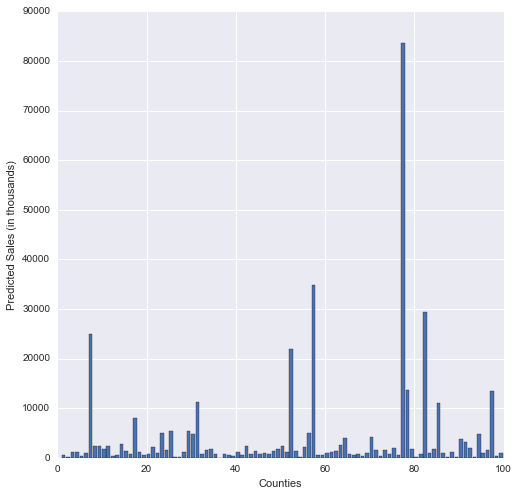

In [37]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(CountyP_Df['County_Number'], CountyP_Df['Total_Sales_Predicted'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

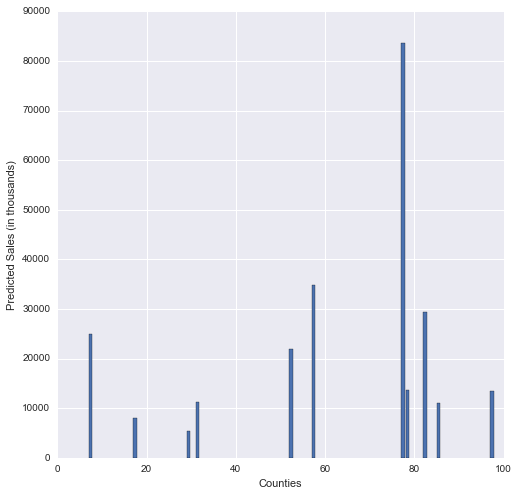

In [38]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(top10CountyTSales['County_Number'], top10CountyTSales['Total_Sales_Predicted'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

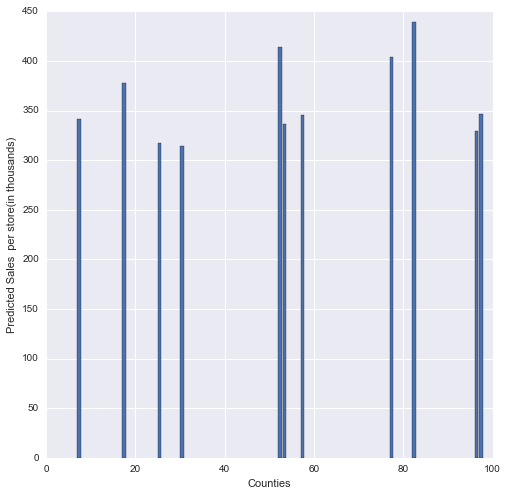

In [39]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(top10Countystore['County_Number'], top10Countystore['PSales_per_Store'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales  per store(in thousands)")
plt.show()

In [40]:
lr_r2 = r2_score(train_Y, predictions)
lr_r2

0.71969683520204097